# Fit emimTF2N data with original parameter formulation - no T dependence of BIP

In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param import constant
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP


In [2]:
# from HFC32_emimTf2N_PR import configuration
from hfc32_emimtf2n_PR import configuration 

In [3]:
data = pd.read_csv('r32_emimtf2n.csv')
data

,temperature,pressure,x_R32,x_emimTf2N
0,283.15,100100,0.136,0.864
1,283.15,250300,0.306,0.694
2,283.15,399300,0.448,0.552
3,283.15,549300,0.570,0.430
4,283.15,700400,0.672,0.328
5,283.15,849400,0.786,0.214
6,298.15,99800,0.095,0.905
7,298.15,250200,0.218,0.782
8,298.15,399400,0.325,0.675
9,298.15,549400,0.417,0.583


In [4]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 348
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /Users/bridgettebefort/Dowling-
    Maginn-Lab/DowlingLab/IL-MD/idaes-
    pse/idaes/generic_models/properties/core/state_definitions/FTPx.py:178)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /Users/bridgettebefort/Dowling-
    Maginn-Lab/DowlingLab/IL-MD/idaes-
    pse/idaes/generic_models/properties/core/state_definitions/FTPx.py:176)
The initial DOF is 7


## T = 298 K

In [6]:
data_298

,temperature,pressure,x_R32,x_emimTf2N
0,298.15,99800,0.095,0.905
1,298.15,250200,0.218,0.782
2,298.15,399400,0.325,0.675
3,298.15,549400,0.417,0.583
4,298.15,699500,0.499,0.501
5,298.15,849500,0.570,0.430
6,298.15,999700,0.643,0.357


In [7]:
constant(data_298, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = -0.0496, init_kappa_A_1_2 = -0.023, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-09-13 08:40:21 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:22 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:22 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:22 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:23 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:23 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-09-13 08:40:23 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale non

In [8]:
k12_298 = -0.03991194861840467
k21_298 = -0.17006795910644007

In [9]:
R32_x,P= calc_outlet_xP(data_298,m,"R32", "emimTf2N", k21_298, k12_298,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


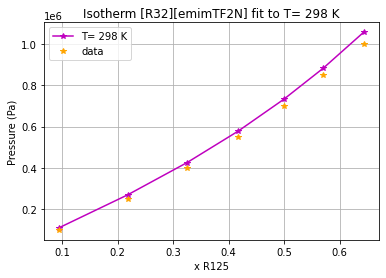

In [10]:
plt.plot(R32_x,P,"m*-",label="T= 298 K")
plt.plot(data_298["x_R32"],data_298["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTF2N] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
# plt.ylim(0,1300000)
plt.legend()
plt.show()